In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Selecting the dataset
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
list(load_breast_cancer().keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
# Selecting the principal features after binary cross validation explained in the article.
newx = X[['mean texture', 'worst area', 'worst smoothness']]

# Gradiente Boosting (GB)

Acurácia = 1.0000
Revocação = 1.0000
Precisão = 1.0000
F1 score = 1.0000
ROC Score = 1.0000


Acurácia = 1.0000
Revocação = 1.0000
Precisão = 1.0000
F1 score = 1.0000
ROC Score = 1.0000


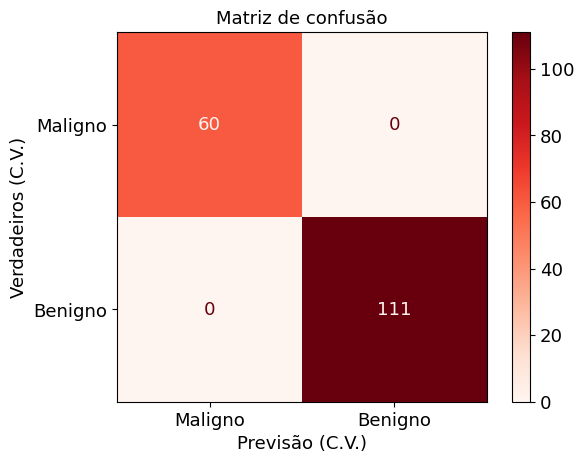

In [1556]:
xTrain, xTest, yTrain, yTest = train_test_split(newx, y, test_size=0.3, random_state=454)
clf = GradientBoostingClassifier(loss='log_loss', learning_rate=1.1, n_estimators=100, max_features='sqrt').fit(xTrain, yTrain)

print(f'Acurácia = {accuracy_score(yTest, clf.predict(xTest)):.4f}')
print(f'Revocação = {recall_score(yTest, clf.predict(xTest)):.4f}')
print(f'Precisão = {precision_score(yTest, clf.predict(xTest)):.4f}')
print(f'F1 score = {f1_score(yTest, clf.predict(xTest)):.4f}')
print(f'ROC Score = {roc_auc_score(yTest, clf.predict(xTest)):.4f}')

print('\n')

print(f'Acurácia = {accuracy_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'Revocação = {recall_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'Precisão = {precision_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'F1 score = {f1_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'ROC Score = {roc_auc_score(yTrain, clf.predict(xTrain)):.4f}')

label_names = ['Maligno', 'Benigno']
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest, clf.predict(xTest)), display_labels=label_names)
disp_test.plot(cmap='Reds', ax=plt.gca(), values_format='d')
plt.ylabel('Verdadeiros (C.V.)', fontsize=13)
plt.xlabel('Previsão (C.V.)', fontsize=13)
plt.title('Matriz de confusão', fontsize=13)
disp_test.ax_.set_xticklabels(disp_test.ax_.get_xticklabels(), fontsize=13)
disp_test.ax_.set_yticklabels(disp_test.ax_.get_yticklabels(), fontsize=13)
plt.savefig(fname='MatrizdeConfusão(G.B.).jpeg', format='jpeg', dpi=600)
plt.show()

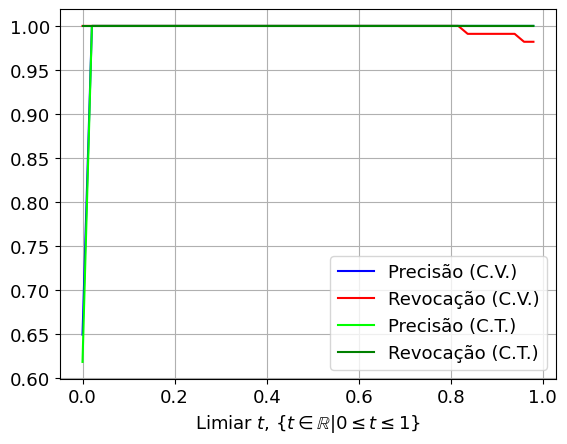

In [1524]:
t = np.linspace(0, 1)
Precision_test =[]
Recall_test = []
Precision_training =[]
Recall_training = []

f_test = 1/(1 + np.exp(-clf.decision_function(xTest)))
f_training = 1/(1 + np.exp(-clf.decision_function(xTrain)))

for i in t[:-1]:
    Precision_test.append(precision_score(yTest, f_test>=i))
    Recall_test.append(recall_score(yTest, f_test>=i))
    Precision_training.append(precision_score(yTrain, f_training>=i))
    Recall_training.append(recall_score(yTrain, f_training>=i))

plt.plot(t[:-1], Precision_test, label='Precisão (C.V.)', color='blue')
plt.plot(t[:-1], Recall_test, label='Revocação (C.V.)', color='red')
plt.plot(t[:-1], Precision_training, label='Precisão (C.T.)', color='lime')
plt.plot(t[:-1], Recall_training, label='Revocação (C.T.)', color='green')
plt.xlabel('Limiar $t$, $\{t\in\mathbb{R}|0\leq t\leq 1\}$', fontsize=13)
plt.legend(fontsize=13)
plt.rcParams['font.size']='13'
plt.grid()
plt.savefig(fname='Limiar(G.B.).jpeg', format='jpeg', dpi=600)
plt.show()

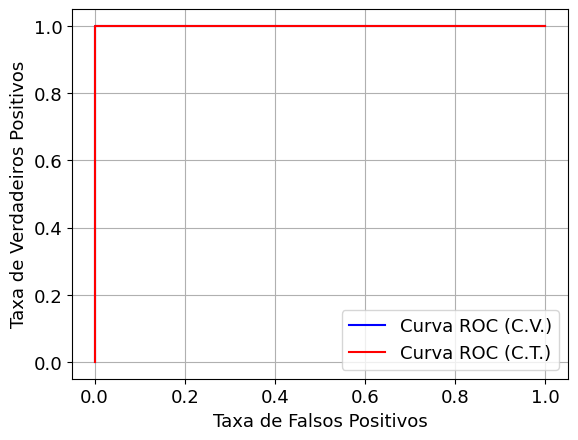

In [1501]:
falsePos_test, truePos_test, thresholds_test = roc_curve(yTest, f_test)
falsePos_train, truePos_train, thresholds_train = roc_curve(yTrain, f_training)


plt.plot(falsePos_test, truePos_test, color='blue', label='Curva ROC (C.V.)')
plt.plot(falsePos_train, truePos_train, color='red', label='Curva ROC (C.T.)')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(fontsize=13)
plt.rcParams['font.size']='13'
plt.grid()
plt.savefig(fname='ROCurve(G.B.).jpeg', format='jpeg', dpi=600)
plt.show()

In [1521]:
data = X[['mean texture', 'worst area', 'worst smoothness']]
xTrain, xTest, yTrain, yTest = train_test_split(data, y, test_size=0.3, random_state=63)
newxTrain, newxTest, newyTrain, newyTest = train_test_split(X, y, test_size=0.3, random_state=63)
data_test = xTest
Vp_test = (yTest==0)*(clf.predict(data_test)==0)
Fn_test = (yTest==0)*(clf.predict(data_test)==1)
Fp_test = (yTest==1)*(clf.predict(data_test)==0)
Vn_test = (yTest==1)*(clf.predict(data_test)==1)

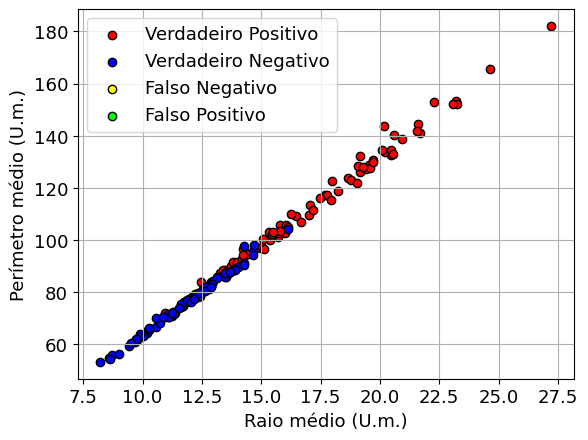

In [1522]:
plt.scatter(newxTest[newyTest==0]['mean radius'][Vp_test], newxTest[newyTest==0]['mean perimeter'][Vp_test], c='red', label='Verdadeiro Positivo', edgecolors='black')
plt.scatter(newxTest[newyTest==1]['mean radius'][Vn_test], newxTest[newyTest==1]['mean perimeter'][Vn_test], c='blue', label='Verdadeiro Negativo', edgecolors='black')
plt.scatter(newxTest[newyTest==0]['mean radius'][Fn_test], newxTest[newyTest==0]['mean perimeter'][Fn_test], c='yellow', label='Falso Negativo', edgecolors='black')
plt.scatter(newxTest[newyTest==1]['mean radius'][Fp_test], newxTest[newyTest==1]['mean perimeter'][Fp_test], c='lime', label='Falso Positivo', edgecolors='black')
plt.legend()
plt.xlabel("Raio médio (U.m.)")
plt.ylabel("Perímetro médio (U.m.)")
plt.grid()
plt.rcParams['font.size']='13'
plt.savefig(fname='RadiusxPerimeter(G.B.).jpeg', format='jpeg', dpi=600)
plt.show()

# Logistic Regression (LR)

In [4]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.model_selection import GridSearchCV
accuracy = []
precision = []
recall = []
for i in range(1000):
    xTrain, xTest, yTrain, yTest = train_test_split(newx, y, test_size=0.3, random_state=i)
    logReg = LogisticRegression(penalty='l2', solver='lbfgs', C=26.5).fit(xTrain, yTrain)
    accuracy.append(accuracy_score(yTest, logReg.predict(xTest)))
    precision.append(precision_score(yTest, logReg.predict(xTest)))
    recall.append(recall_score(yTest, logReg.predict(xTest)))
# param_dict = {'C':np.arange(1,50, 5), 'penalty': ['l2']}
# best_logReg = GridSearchCV(logReg, param_dict).fit(xTrain, yTrain)
max(accuracy)

0.9824561403508771

In [45]:
accuracy.index(max(accuracy))

131

Desempenho no conjunto de treino
Acurácia: 0.9296
Precisão: 0.9258
Revocação: 0.9634
F1 Score: 0.9442
ROC Score: 0.9192

Desempenho no conjunto de teste
Acurácia: 0.9766
Precisão: 0.9820
Revocação: 0.9820
F1 Score: 0.9820
ROC Score: 0.9743


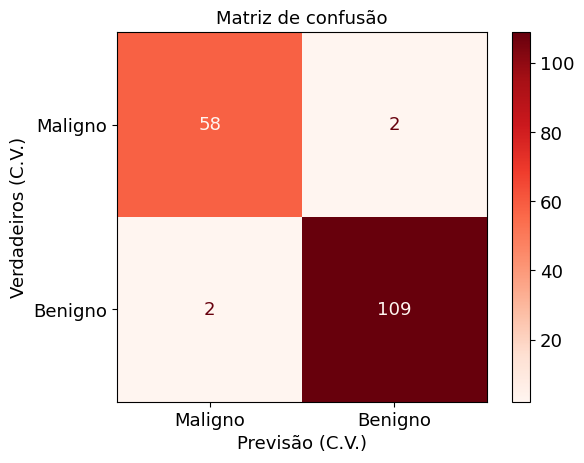

In [1523]:
xTrain, xTest, yTrain, yTest = train_test_split(newx, y, test_size=0.3, random_state=454)
logReg = LogisticRegression(penalty='l2', solver='lbfgs', C=26.5).fit(xTrain, yTrain)
print('Desempenho no conjunto de treino')
print(f'Acurácia: {accuracy_score(yTrain, logReg.predict(xTrain)):.4f}')
print(f'Precisão: {precision_score(yTrain, logReg.predict(xTrain)):.4f}')
print(f'Revocação: {recall_score(yTrain, logReg.predict(xTrain)):.4f}')
print(f'F1 Score: {f1_score(yTrain, logReg.predict(xTrain)):.4f}')
print(f'ROC Score: {roc_auc_score(yTrain, logReg.predict(xTrain)):.4f}')

print('\nDesempenho no conjunto de teste')
print(f'Acurácia: {accuracy_score(yTest, logReg.predict(xTest)):.4f}')
print(f'Precisão: {precision_score(yTest, logReg.predict(xTest)):.4f}')
print(f'Revocação: {recall_score(yTest, logReg.predict(xTest)):.4f}')
print(f'F1 Score: {f1_score(yTest, logReg.predict(xTest)):.4f}')
print(f'ROC Score: {roc_auc_score(yTest, logReg.predict(xTest)):.4f}')

label_names = ['Maligno', 'Benigno']
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest, logReg.predict(xTest)), display_labels=label_names)
disp_test.plot(cmap='Reds', ax=plt.gca())
plt.ylabel('Verdadeiros (C.V.)', fontsize=13)
plt.xlabel('Previsão (C.V.)', fontsize=13)
plt.title('Matriz de confusão', fontsize=13)
disp_test.ax_.set_xticklabels(disp_test.ax_.get_xticklabels(), fontsize=13)
disp_test.ax_.set_yticklabels(disp_test.ax_.get_yticklabels(), fontsize=13)
plt.savefig(fname='MatrizdeConfusão(L.R.).jpeg', format='jpeg', dpi=600)
plt.show()

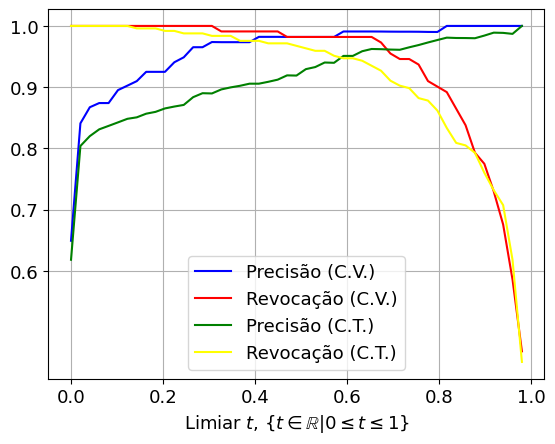

In [1526]:
t = np.linspace(0, 1)
Precision_test =[]
Recall_test = []
Precision_training =[]
Recall_training = []

f_test = 1/(1 + np.exp(-logReg.decision_function(xTest)))
f_training = 1/(1 + np.exp(-logReg.decision_function(xTrain)))

for i in t[:-1]:
    Precision_test.append(precision_score(yTest, f_test>=i))
    Recall_test.append(recall_score(yTest, f_test>=i))
    Precision_training.append(precision_score(yTrain, f_training>=i))
    Recall_training.append(recall_score(yTrain, f_training>=i))

plt.plot(t[:-1], Precision_test, label='Precisão (C.V.)', color='blue')
plt.plot(t[:-1], Recall_test, label='Revocação (C.V.)', color='red')
plt.plot(t[:-1], Precision_training, label='Precisão (C.T.)', color='green')
plt.plot(t[:-1], Recall_training, label='Revocação (C.T.)', color='yellow')
plt.xlabel('Limiar $t$, $\{t\in\mathbb{R}|0\leq t\leq 1\}$', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.yticks(np.linspace(0.6, 1.0, 5))
plt.rcParams['font.size']='13'
plt.savefig(fname='Limiar(L.R.).jpeg', format='jpeg', dpi=600)
plt.show()

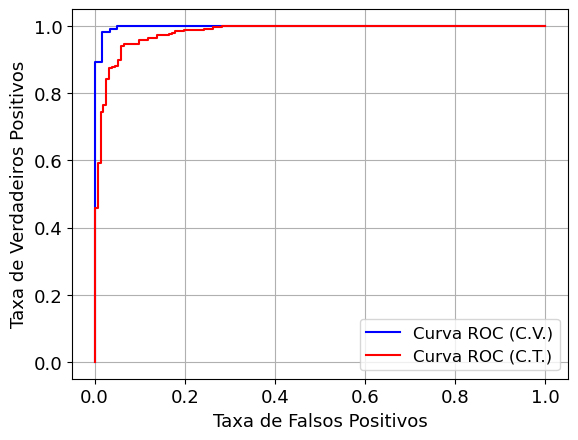

In [1527]:
falsePos_test, truePos_test, thresholds_test = roc_curve(yTest, f_test)
falsePos_train, truePos_train, thresholds_train = roc_curve(yTrain, f_training)


plt.plot(falsePos_test, truePos_test, color='blue', label='Curva ROC (C.V.)')
plt.plot(falsePos_train, truePos_train, color='red', label='Curva ROC (C.T.)')
plt.xlabel("Taxa de Falsos Positivos", fontsize=13)
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.rcParams['font.size']='13'
plt.savefig(fname='ROCurve(L.R.).jpeg', format='jpeg', dpi=600)
plt.show()

In [1528]:
data = X[['mean texture', 'worst area', 'worst smoothness']]
xTrain, xTest, yTrain, yTest = train_test_split(data, y, test_size=0.3, random_state=454)
newxTrain, newxTest, newyTrain, newyTest = train_test_split(X, y, test_size=0.3, random_state=454)
data_test = xTest
Vp_test = (yTest==0)*(logReg.predict(data_test)==0)
Fn_test = (yTest==0)*(logReg.predict(data_test)==1)
Fp_test = (yTest==1)*(logReg.predict(data_test)==0)
Vn_test = (yTest==1)*(logReg.predict(data_test)==1)

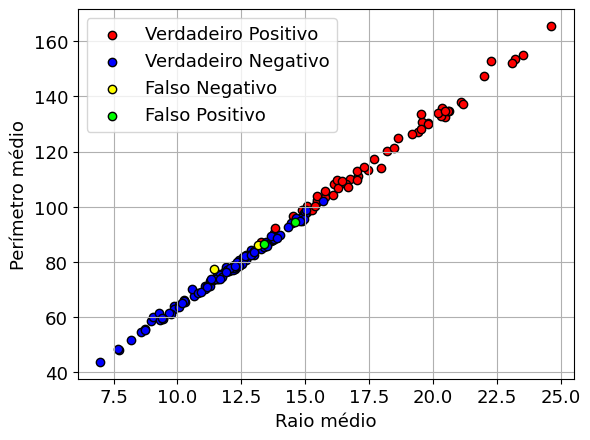

In [1534]:
plt.scatter(newxTest[newyTest==0]['mean radius'][Vp_test], newxTest[newyTest==0]['mean perimeter'][Vp_test], c='red', label='Verdadeiro Positivo', edgecolors='black')
plt.scatter(newxTest[newyTest==1]['mean radius'][Vn_test], newxTest[newyTest==1]['mean perimeter'][Vn_test], c='blue', label='Verdadeiro Negativo', edgecolors='black')
plt.scatter(newxTest[newyTest==0]['mean radius'][Fn_test], newxTest[newyTest==0]['mean perimeter'][Fn_test], c='yellow', label='Falso Negativo', edgecolors='black')
plt.scatter(newxTest[newyTest==1]['mean radius'][Fp_test], newxTest[newyTest==1]['mean perimeter'][Fp_test], c='lime', label='Falso Positivo', edgecolors='black')
plt.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
plt.grid()
plt.rcParams['font.size']='13'
plt.savefig(fname='RadiusxPerimeter(L.R.).jpeg', format='jpeg', dpi=600)
plt.show()

# Support Vector Machine (SVM)

In [465]:
accuracy = []
recall = []
precision = []
for i in range(100):
    xTrain, xTest, yTrain, yTest = train_test_split(newx, y, test_size=0.3, random_state=i)
    clf = SVC(kernel='linear', C=26.5, gamma='auto').fit(xTrain, yTrain)
    accuracy.append(accuracy_score(yTest, clf.predict(xTest)))
    precision.append(precision_score(yTest, clf.predict(xTest)))
    recall.append(recall_score(yTest, clf.predict(xTest)))

In [471]:
accuracy.index(max(accuracy))
# precision.index(max(precision))

63

Desempenho no conjunto de treino
Acurácia: 0.9146
Precisão: 0.9077
Revocação: 0.9593
F1 Score: 0.9328
ROC Score: 0.9007

Desempenho no conjunto de teste
Acurácia: 0.9766
Precisão: 0.9820
Revocação: 0.9820
F1 Score: 0.9820
ROC Score: 0.9743


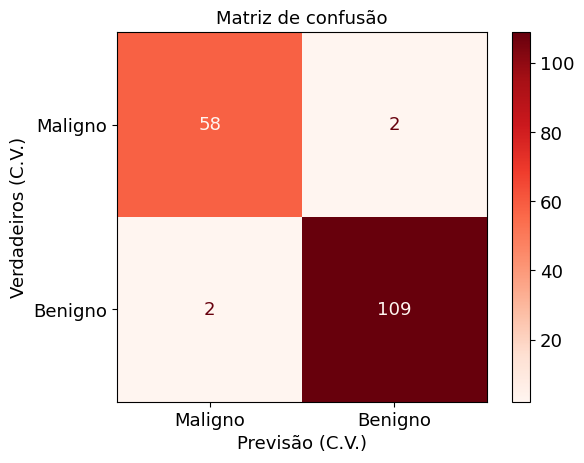

In [1535]:
xTrain, xTest, yTrain, yTest = train_test_split(newx, y, test_size=0.3, random_state=454)
clf = SVC(kernel='linear', gamma=0.1).fit(xTrain, yTrain)
print('Desempenho no conjunto de treino')
print(f'Acurácia: {accuracy_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'Precisão: {precision_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'Revocação: {recall_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'F1 Score: {f1_score(yTrain, clf.predict(xTrain)):.4f}')
print(f'ROC Score: {roc_auc_score(yTrain, clf.predict(xTrain)):.4f}')

print('\nDesempenho no conjunto de teste')
print(f'Acurácia: {accuracy_score(yTest, clf.predict(xTest)):.4f}')
print(f'Precisão: {precision_score(yTest, clf.predict(xTest)):.4f}')
print(f'Revocação: {recall_score(yTest, clf.predict(xTest)):.4f}')
print(f'F1 Score: {f1_score(yTest, clf.predict(xTest)):.4f}')
print(f'ROC Score: {roc_auc_score(yTest, clf.predict(xTest)):.4f}')

label_names = ['Maligno', 'Benigno']
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(yTest, clf.predict(xTest)), display_labels=label_names)
disp_test.plot(cmap='Reds', ax=plt.gca())
plt.ylabel('Verdadeiros (C.V.)', fontsize=13)
plt.xlabel('Previsão (C.V.)', fontsize=13)
plt.title('Matriz de confusão', fontsize=13)
disp_test.ax_.set_xticklabels(disp_test.ax_.get_xticklabels(), fontsize=13)
disp_test.ax_.set_yticklabels(disp_test.ax_.get_yticklabels(), fontsize=13)
plt.savefig(fname='MatrizdeConfusão(S.V.M.).jpeg', format='jpeg', dpi=600)
plt.show()

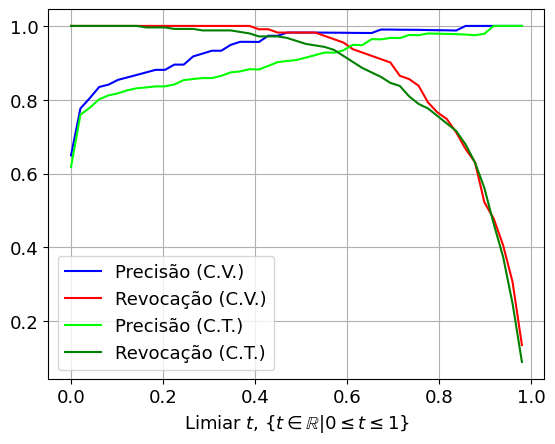

In [1537]:
t = np.linspace(0, 1)
Precision_test =[]
Recall_test = []
Precision_training =[]
Recall_training = []

f_test = 1/(1 + np.exp(-clf.decision_function(xTest)))
f_training = 1/(1 + np.exp(-clf.decision_function(xTrain)))

for i in t[:-1]:
    Precision_test.append(precision_score(yTest, f_test>=i))
    Recall_test.append(recall_score(yTest, f_test>=i))
    Precision_training.append(precision_score(yTrain, f_training>=i))
    Recall_training.append(recall_score(yTrain, f_training>=i))

plt.plot(t[:-1], Precision_test, label='Precisão (C.V.)', color='blue')
plt.plot(t[:-1], Recall_test, label='Revocação (C.V.)', color='red')
plt.plot(t[:-1], Precision_training, label='Precisão (C.T.)', color='lime')
plt.plot(t[:-1], Recall_training, label='Revocação (C.T.)', color='green')
plt.xlabel('Limiar $t$, $\{t\in\mathbb{R}|0\leq t\leq 1\}$', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.rcParams['font.size']='13'
plt.savefig(fname='Limiar(S.V.M.).jpeg', format='jpeg', dpi=600)
plt.show()

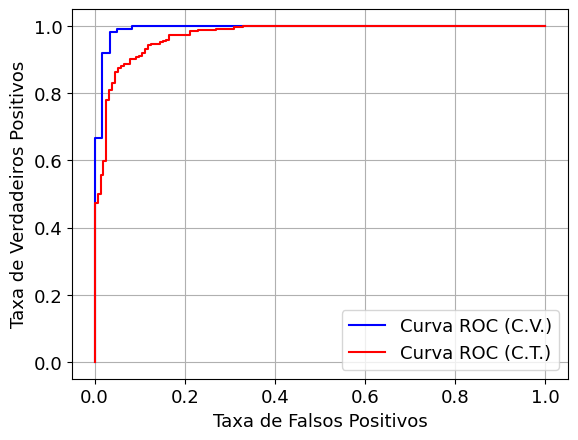

In [1538]:
falsePos_test, truePos_test, thresholds_test = roc_curve(yTest, f_test)
falsePos_train, truePos_train, thresholds_train = roc_curve(yTrain, f_training)


plt.plot(falsePos_test, truePos_test, color='blue', label='Curva ROC (C.V.)')
plt.plot(falsePos_train, truePos_train, color='red', label='Curva ROC (C.T.)')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.grid()
plt.rcParams['font.size']='13'
plt.savefig(fname='ROCurve(S.V.M.).jpeg', format='jpeg', dpi=600)
plt.show()

In [1539]:
data = X[['mean texture', 'worst area', 'worst smoothness']]
xTrain, xTest, yTrain, yTest = train_test_split(data, y, test_size=0.3, random_state=454)
newxTrain, newxTest, newyTrain, newyTest = train_test_split(X, y, test_size=0.3, random_state=454)
data_test = xTest
Vp_test = (yTest==0)*(clf.predict(data_test)==0)
Fn_test = (yTest==0)*(clf.predict(data_test)==1)
Fp_test = (yTest==1)*(clf.predict(data_test)==0)
Vn_test = (yTest==1)*(clf.predict(data_test)==1)

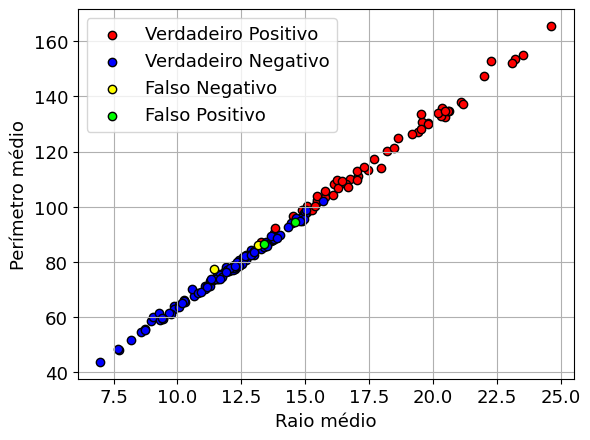

In [1541]:
plt.scatter(newxTest[newyTest==0]['mean radius'][Vp_test], newxTest[newyTest==0]['mean perimeter'][Vp_test], c='red', label='Verdadeiro Positivo', edgecolors='black')
plt.scatter(newxTest[newyTest==1]['mean radius'][Vn_test], newxTest[newyTest==1]['mean perimeter'][Vn_test], c='blue', label='Verdadeiro Negativo', edgecolors='black')
plt.scatter(newxTest[newyTest==0]['mean radius'][Fn_test], newxTest[newyTest==0]['mean perimeter'][Fn_test], c='yellow', label='Falso Negativo', edgecolors='black')
plt.scatter(newxTest[newyTest==1]['mean radius'][Fp_test], newxTest[newyTest==1]['mean perimeter'][Fp_test], c='lime', label='Falso Positivo', edgecolors='black')
plt.legend()
plt.xlabel("Raio médio")
plt.ylabel("Perímetro médio")
plt.grid()
plt.rcParams['font.size']='13'
plt.savefig(fname='RadiusxPerimeter(S.V.M.).jpeg', format='jpeg', dpi=600)
plt.show()

# Avaliando os classificadores

In [1094]:
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, KFold, cross_validate

In [1561]:
# Validação cruzada no Gradient Boosting
scoring = ['accuracy', 'precision', 'recall', 'f1_micro', 'roc_auc']
scores_GB = cross_validate(clf, xTest, yTest, cv=10, scoring=scoring)
print('VALIDAÇÃO CRUZADA NO GRADIENT BOOSTING (VALIDAÇÃO)')
print('Acurácia média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_accuracy'].mean(), scores_GB['test_accuracy'].std()))
print('Precisão média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_precision'].mean(), scores_GB['test_precision'].std()))
print('Revocação média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_recall'].mean(), scores_GB['test_recall'].std()))
print('F1 Score média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_f1_micro'].mean(), scores_GB['test_f1_micro'].std()))
print('ROC média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_roc_auc'].mean(), scores_GB['test_roc_auc'].std()))

print('\n')

scores_GB = cross_validate(clf, xTrain, yTrain, cv=10, scoring=scoring)
print('VALIDAÇÃO CRUZADA COM GRADIENT BOOSTING (TREINAMENTO)')
print('Acurácia média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_accuracy'].mean(), scores_GB['test_accuracy'].std()))
print('Precisão média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_precision'].mean(), scores_GB['test_precision'].std()))
print('Revocação média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_recall'].mean(), scores_GB['test_recall'].std()))
print('F1 Score média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_f1_micro'].mean(), scores_GB['test_f1_micro'].std()))
print('ROC média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_GB['test_roc_auc'].mean(), scores_GB['test_roc_auc'].std()))

VALIDAÇÃO CRUZADA NO GRADIENT BOOSTING (VALIDAÇÃO)
Acurácia média: 0.9827, com desvio padrão igual a 0.0265
Precisão média: 0.9756, com desvio padrão igual a 0.0372
Revocação média: 1.0000, com desvio padrão igual a 0.0000
F1 Score média: 0.9827, com desvio padrão igual a 0.0265
ROC média: 0.9985, com desvio padrão igual a 0.0045


VALIDAÇÃO CRUZADA COM GRADIENT BOOSTING (TREINAMENTO)
Acurácia média: 0.9448, com desvio padrão igual a 0.0383
Precisão média: 0.9448, com desvio padrão igual a 0.0248
Revocação média: 0.9678, com desvio padrão igual a 0.0500
F1 Score média: 0.9448, com desvio padrão igual a 0.0383
ROC média: 0.9757, com desvio padrão igual a 0.0283


In [1427]:
# Válidação cruzada na Regressão Logística
scoring = ['accuracy', 'precision', 'recall', 'f1_micro', 'roc_auc']
scores_LR = cross_validate(logReg, xTest, yTest, cv=10, scoring=scoring)
print('VALIDAÇÃO CRUZADA COM REGRESSÃO LOGÍSTICA (VALIDAÇÃO)')
print('Acurácia média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_accuracy'].mean(), scores_LR['test_accuracy'].std()))
print('Precisão média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_precision'].mean(), scores_LR['test_precision'].std()))
print('Revocação média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_recall'].mean(), scores_LR['test_recall'].std()))
print('F1 Score média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_f1_micro'].mean(), scores_LR['test_f1_micro'].std()))
print('ROC média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_roc_auc'].mean(), scores_LR['test_roc_auc'].std()))

print('\n')

scores_LR = cross_validate(logReg, xTrain, yTrain, cv=10, scoring=scoring)
print('VALIDAÇÃO CRUZADA COM REGRESSÃO LOGÍSTICA (TREINAMENTO)')
print('Acurácia média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_accuracy'].mean(), scores_LR['test_accuracy'].std()))
print('Precisão média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_precision'].mean(), scores_LR['test_precision'].std()))
print('Revocação média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_recall'].mean(), scores_LR['test_recall'].std()))
print('F1 Score média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_f1_micro'].mean(), scores_LR['test_f1_micro'].std()))
print('ROC média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_LR['test_roc_auc'].mean(), scores_LR['test_roc_auc'].std()))

VALIDAÇÃO CRUZADA COM REGRESSÃO LOGÍSTICA (VALIDAÇÃO)
Acurácia média: 0.9657, com desvio padrão igual a 0.0577
Precisão média: 0.9717, com desvio padrão igual a 0.0624
Revocação média: 0.9818, com desvio padrão igual a 0.0545
F1 Score média: 0.9657, com desvio padrão igual a 0.0577
ROC média: 0.9859, com desvio padrão igual a 0.0336


VALIDAÇÃO CRUZADA COM REGRESSÃO LOGÍSTICA (TREINAMENTO)
Acurácia média: 0.9197, com desvio padrão igual a 0.0443
Precisão média: 0.9181, com desvio padrão igual a 0.0269
Revocação média: 0.9558, com desvio padrão igual a 0.0631
F1 Score média: 0.9197, com desvio padrão igual a 0.0443
ROC média: 0.9775, com desvio padrão igual a 0.0220


In [1469]:
# Validação cruzada nas Máquinas de Suporte Vetorial
scoring = ['accuracy', 'precision', 'recall', 'f1_micro', 'roc_auc']
scores_SVM = cross_validate(clf, xTest, yTest, cv=10, scoring=scoring)
print('VALIDAÇÃO CRUZADA COM MÁQUINA DE SUPORTE VETORIAL (VALIDAÇÃO)')
print('Acurácia média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_accuracy'].mean(), scores_SVM['test_accuracy'].std()))
print('Precisão média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_precision'].mean(), scores_SVM['test_precision'].std()))
print('Revocação média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_recall'].mean(), scores_SVM['test_recall'].std()))
print('F1 Score média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_f1_micro'].mean(), scores_SVM['test_f1_micro'].std()))
print('ROC média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_roc_auc'].mean(), scores_SVM['test_roc_auc'].std()))

print('\n')

scores_SVM = cross_validate(clf, xTrain, yTrain, cv=10, scoring=scoring)
print('VALIDAÇÃO CRUZADA COM RMÁQUINA DE SUPORTE VETORIAL (TREINAMENTO)')
print('Acurácia média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_accuracy'].mean(), scores_SVM['test_accuracy'].std()))
print('Precisão média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_precision'].mean(), scores_SVM['test_precision'].std()))
print('Revocação média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_recall'].mean(), scores_SVM['test_recall'].std()))
print('F1 Score média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_f1_micro'].mean(), scores_SVM['test_f1_micro'].std()))
print('ROC média: {:.4f}, com desvio padrão igual a {:.4f}'.format(scores_SVM['test_roc_auc'].mean(), scores_SVM['test_roc_auc'].std()))

VALIDAÇÃO CRUZADA COM MÁQUINA DE SUPORTE VETORIAL (VALIDAÇÃO)
Acurácia média: 0.9657, com desvio padrão igual a 0.0577
Precisão média: 0.9717, com desvio padrão igual a 0.0624
Revocação média: 0.9818, com desvio padrão igual a 0.0545
F1 Score média: 0.9657, com desvio padrão igual a 0.0577
ROC média: 0.9859, com desvio padrão igual a 0.0336


VALIDAÇÃO CRUZADA COM RMÁQUINA DE SUPORTE VETORIAL (TREINAMENTO)
Acurácia média: 0.9122, com desvio padrão igual a 0.0463
Precisão média: 0.9040, com desvio padrão igual a 0.0266
Revocação média: 0.9598, com desvio padrão igual a 0.0620
F1 Score média: 0.9122, com desvio padrão igual a 0.0463
ROC média: 0.9704, com desvio padrão igual a 0.0239
